# Generate Initial Conditions for Filament Simulations

In [1]:
import sys, os
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
from pyfilaments.activeFilaments import activeFilament
import pyfilaments.analysisutils as analysis
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
from sys import platform

from joblib import Parallel, delayed
import multiprocessing

# Check which platform
if platform == "linux" or platform == "linux2":
	print("linux system")
	root_path = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults'
	# root_path = '/home/deepak/Dropbox/LacryModeling/ModellingResults'
	

elif platform == 'darwin':
	print("OSX system")
	root_path = '/Users/deepak/Dropbox/LacryModeling/'

OSX system


/Users/deepak/PyFilaments/pyfilaments/filamentShapeGenerator.py:86: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(self.init_condition['filament'])==self.Np*self.dim, 'Filament shape supplied does not match current filament parameters')


dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_darwin_darwin', '_osx_support', 're', 'enum', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'copyreg', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipyk

OSX system


## Generate ICs from a random filament shape by adding small angular perturbations

In [6]:
file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point/SimResults_00_.hdf5'

# filament = analysis.analysisTools(file = os.path.join(root_folder, track_folder, file))
filament = analysis.analysisTools(file = file)

file_path = filament.analysisFolder

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.526_activityTime_750_simType_point
Data file SimResults_00_.hdf5


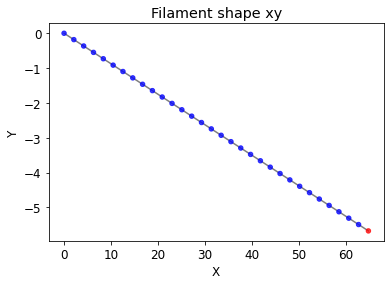

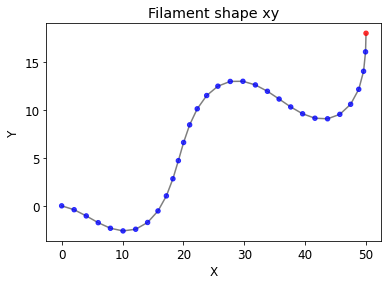

In [8]:
# Plot the initial filament shape
plt.figure()
filament.plotFilament(filament.R[0,:])
plt.figure()
filament.plotFilament(filament.R[1000,:])

In [29]:
init_filament_shape = filament.R[0,:]

delta_theta = 1e-12*np.random.randn(1)

print(delta_theta)

# calculate the separation vectors
filament.r = init_filament_shape

x_pos = init_filament_shape[0:filament.Np]

y_pos = init_filament_shape[filament.Np:2*filament.Np]

delta_x = -y_pos*delta_theta
delta_y = x_pos*delta_theta

x_final = x_pos + delta_x
y_final = y_pos +delta_y


final_shape = np.zeros_like(init_filament_shape)

final_shape[0:filament.Np] = x_final
final_shape[filament.Np:2*filament.Np] = y_final
final_shape[2*filament.Np:3*filament.Np] = init_filament_shape[2*filament.Np:3*filament.Np]

[-9.50622694e-13]


<IPython.core.display.Javascript object>


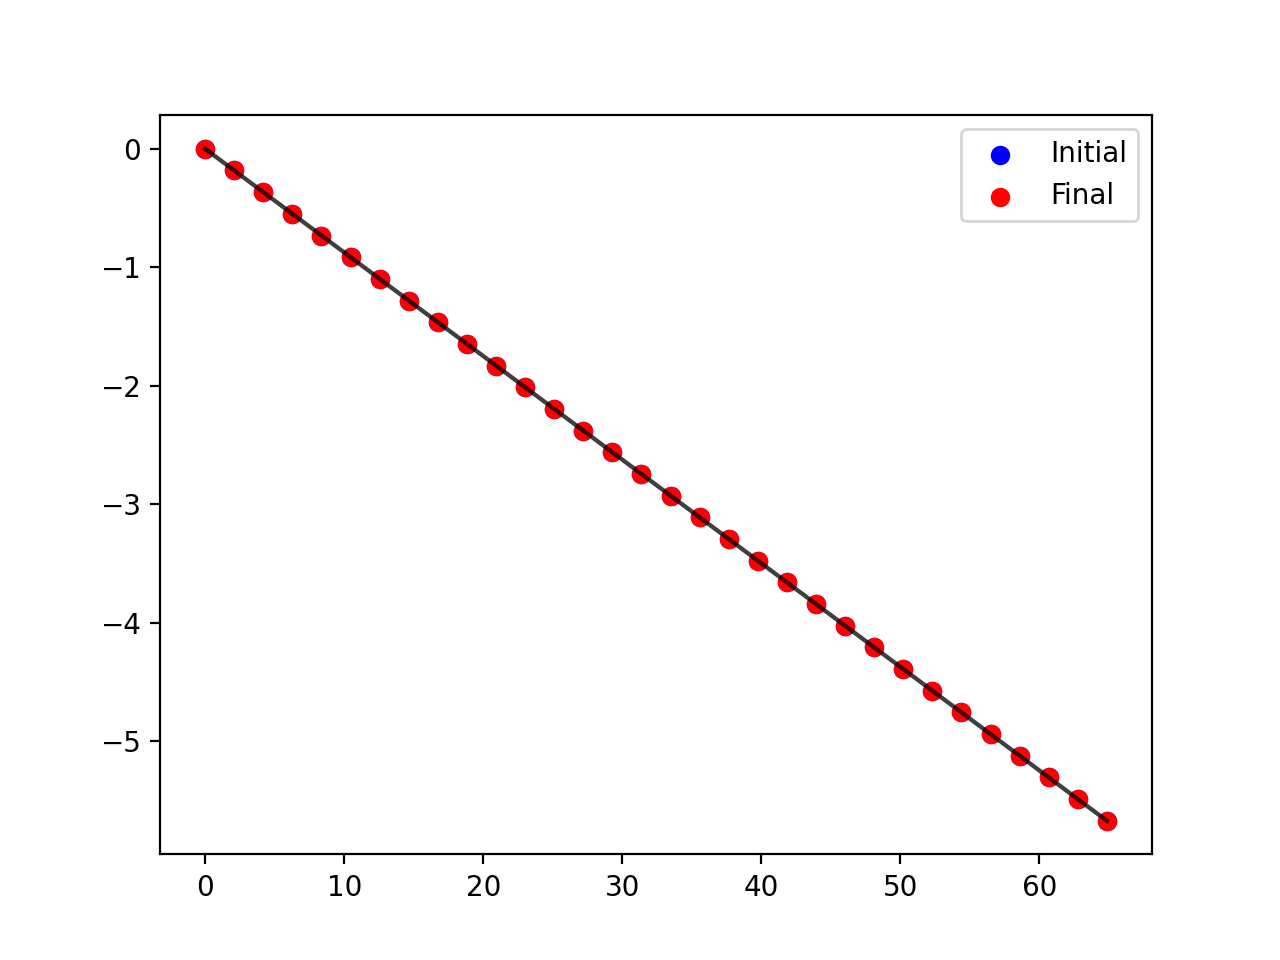

In [30]:
# Plot the initial and final shapes of the filament (before and after perturbation)
%matplotlib notebook

plt.figure()

plt.scatter(init_filament_shape[0:filament.Np], init_filament_shape[filament.Np:2*filament.Np], color = 'b', label = 'Initial')
plt.plot(init_filament_shape[0:filament.Np], init_filament_shape[filament.Np:2*filament.Np], color = 'k', alpha = 0.5)


plt.scatter(final_shape[0:filament.Np], final_shape[filament.Np:2*filament.Np], color = 'r', label = 'Final')
plt.plot(final_shape[0:filament.Np], final_shape[filament.Np:2*filament.Np], color = 'k', alpha = 0.5)

plt.legend()
plt.show()


In [27]:
# Filament parameters
# Activity profile parameters
activity_timescale = 750
duty_cycle = 0.5

# No:of activity cycles we want to simulate
n_activity_cycles = 10
# Total simulation time
Tf = activity_timescale*n_activity_cycles

# Total simulation time
# No:of time points saved
time_step_save = 20
Npts = int(Tf/time_step_save)


bc = {0:'clamped', -1:'free'} # Filament BCs

DIM = 3
Np = 32
radius = 1
b0 = 2.1*radius
k = 25
S0 = 0
D0 = 1.5

# Filament activity sweep
fil = activeFilament(dim = DIM, Np = Np, radius = radius, b0 = b0, k = k, S0 = S0, D0 = D0, bc = bc)

# fil.simulate(Tf, Npts, n_cycles = n_activity_cycles, save = False, overwrite = False, path = root_path, 
#              sim_type = 'point', init_condition = {'shape':'line'}, 
# activity={'type':'square-wave','activity_timescale':activity_timescale, 'duty_cycle':duty_cycle, 'start phase':0})


In [14]:
import pyfilaments.analysisutils as analysis

# Import the filament as an Analysis object.
fil = analysis.analysisTools(filament = fil)

dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', 're', 'enum', 

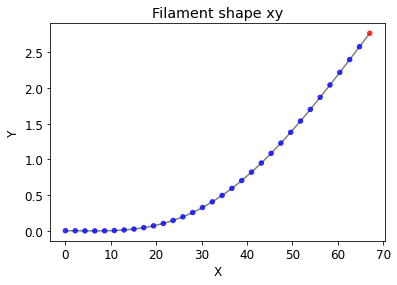

In [15]:
final_shape = fil.R[-1,:]
plt.figure()
fil.plotFilament(r = final_shape)

## Generate IC from the simulated filament shapes

In [24]:
import random

N_cycles = int(fil.Time[-1]/fil.activity_timescale)
N_transient = 0 # No:of activity cycles for transients to decay. 

N_IC_time = 10 # IC based on different activity cycles/time

# Choose n random activity cycles (time)
n_cycles = random.sample(range(N_transient, N_cycles), N_IC_time)

print(n_cycles)

time_points = np.array(range(0, len(fil.Time)))
# Find the index corresponding to each unique IC

# Create empty array to store indices for each unique IC
ic_mesh = np.empty(N_IC_time, dtype = int)

# Phase array for the whole simulation
phase_array = 2*np.pi*(fil.Time%fil.activity_timescale)/fil.activity_timescale
delta_phase = 2*np.pi*np.mean(fil.Time[1:] - fil.Time[:-1])/fil.activity_timescale # Smallest change in phase


phase = 0 # End of extension, Start of compression

    
print(phase)

abs_val_array = np.abs(phase_array  - phase)
constant_phase_mask = abs_val_array <= 0.5*delta_phase

time_indices = time_points[constant_phase_mask]

ic_mesh = time_indices[n_cycles]
    
    
print(ic_mesh)

[8, 7, 3, 9, 4, 1, 5, 2, 6, 0]
0
[300 263 113 338 150  38 188  75 225   0]


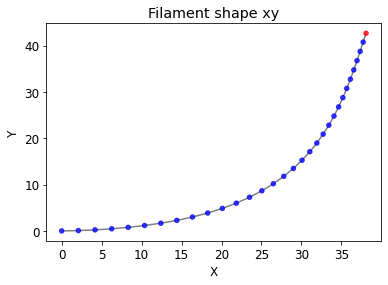

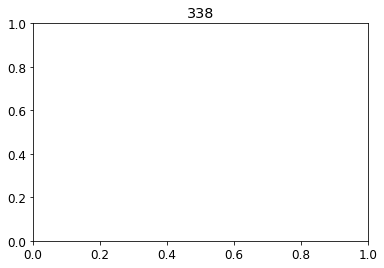

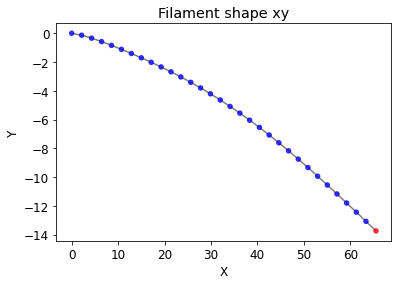

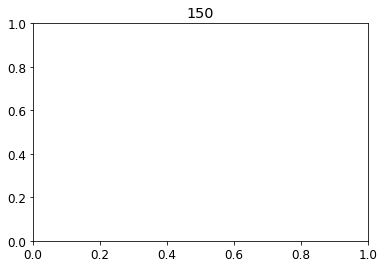

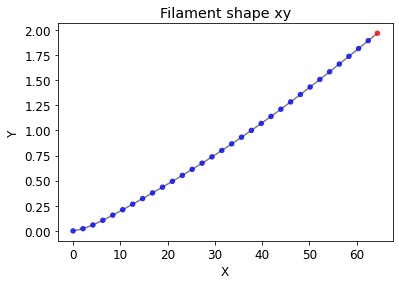

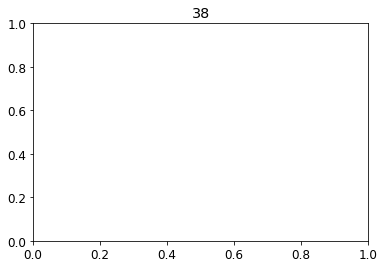

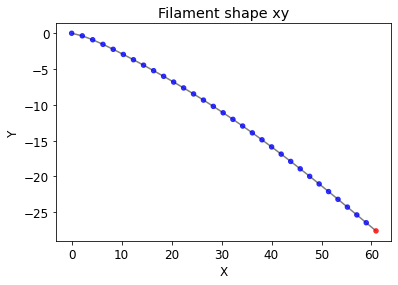

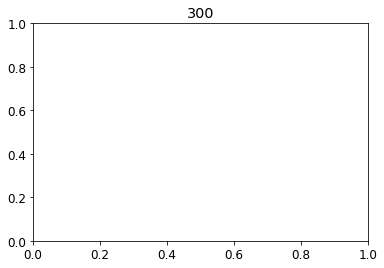

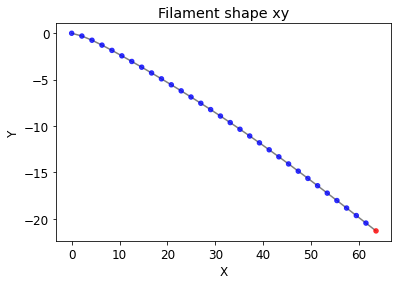

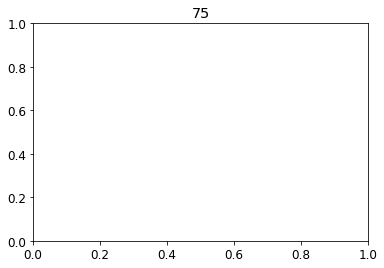

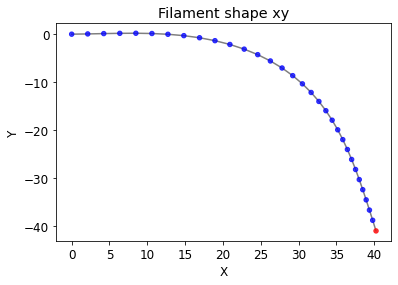

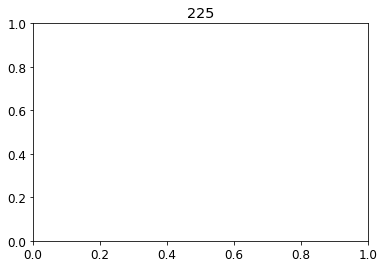

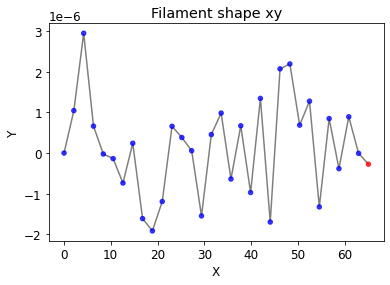

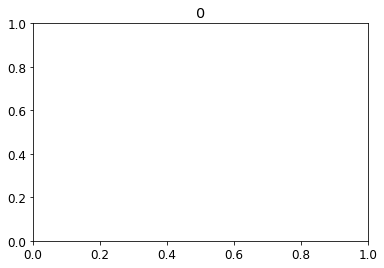

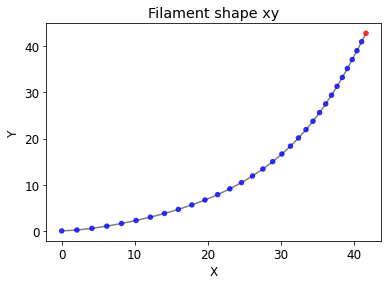

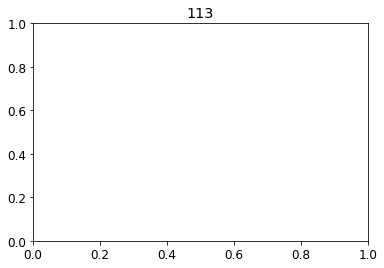

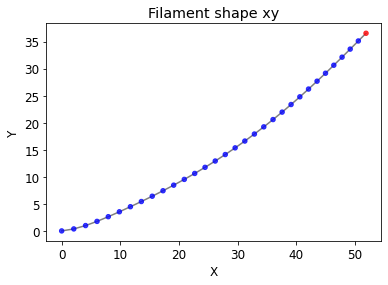

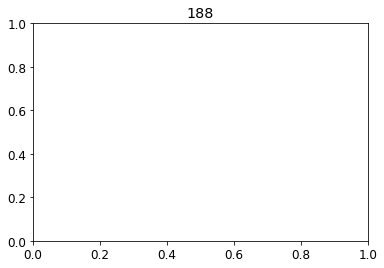

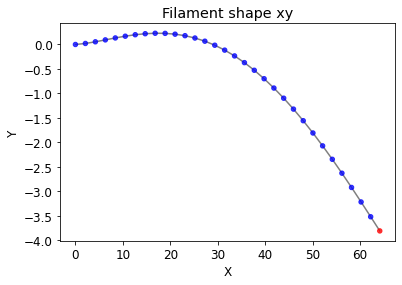

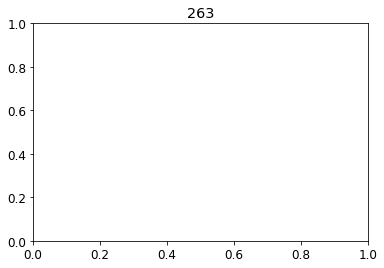

In [22]:
import h5py


filament_init_shape = np.zeros(fil.Np*fil.dim, dtype = np.double)

ic_folder = os.path.join(fil.saveFolder, 'InitialConditions')

if not os.path.exists(ic_folder):
    os.makedirs(ic_folder)
    
for ii in range(N_IC_time):
    
        
    time_index = ic_mesh[ii]

    phase = phase_array[time_index]




    filament_init_shape = fil.R[time_index,:]

    plt.figure()
    fil.plotFilament(r = filament_init_shape)
    plt.title(time_index)


    save_file = 'filament_ic_{0:03d}'.format(ii)


    # Save the resulting filament shapes to disk
    with h5py.File(os.path.join(ic_folder, save_file), "w") as f:

        dset = f.create_group("simulation data")
        dset.create_dataset("Initial Position", data = filament_init_shape)
        dset.attrs['Time index'] = time_index
        # Also save the phase value of the simulation
        dset.attrs['Phase'] = phase

In [ ]:
## Run filament simulation using these initial conditions
# No:of activity cycles we want to simulate
n_activity_cycles = 100
# Total simulation time
Tf = fil.activity_timescale*n_activity_cycles

# activity_timescale = 1000

# Total simulation time
# No:of time points saved
time_step_save = 20
Npts = int(Tf/time_step_save)

bc = {0:'clamped', -1:'free'}

dim = fil.dim
Np = fil.Np
radius = fil.radius
b0 = fil.b0
k = fil.k
S0 = fil.S0
D0 = fil.D0
activity_timescale = fil.activity_timescale


def run_parametric_simulation(parameter_value):
    
    # Generate the Initial Conditions for given parameter value
    # Check if it 
    
    
    # Simulate each IC
    new_fil = activeFilament(dim = dim, Np = Np, radius = radius, b0 = b0, k = k, S0 = S0, D0 = D0, bc = bc)

    new_fil.simulate(Tf, Npts, n_cycles = n_activity_cycles, save = True, overwrite = False, path = path, sim_type = 'point', 
    init_condition = {'filament':filament_shape}, 
    activity={'type':'square-wave','activity_timescale':activity_timescale, 'duty_cycle':0.5, 'start phase':phase},
                note = ic, create_subdirs=False)

[0.737798274706694, -0.3569991651806583, 0.03966657390896211, -0.7695315338338634, -0.26179938779914935, 0.30939927648990384, 0.6267318677616003, 0.563265349507261, 0.11899972172688611, -0.1983328695448101]


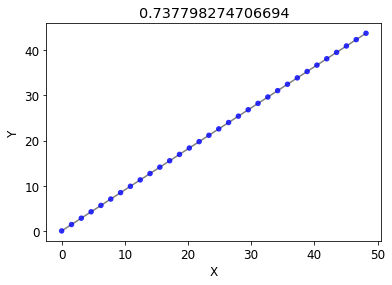

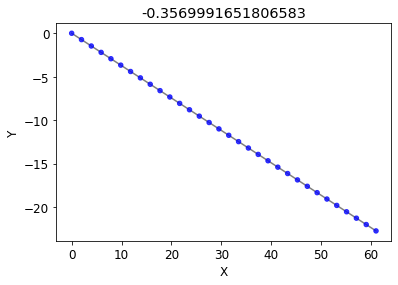

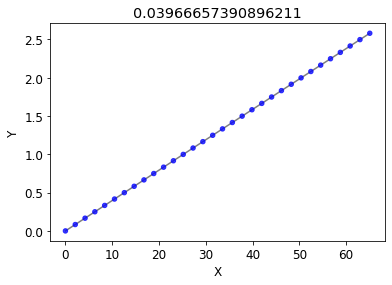

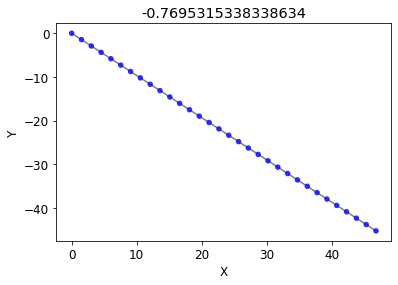

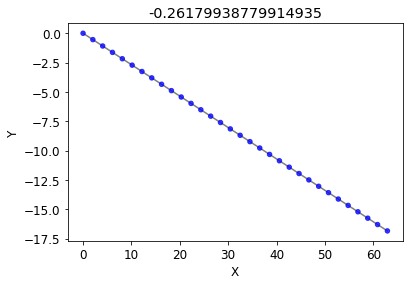

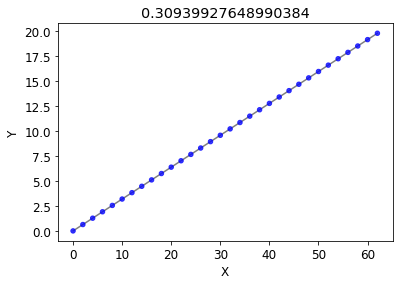

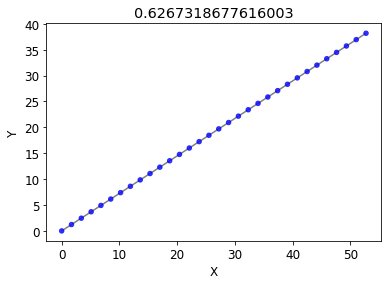

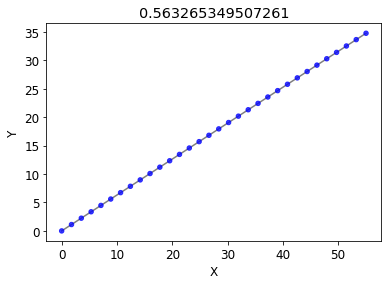

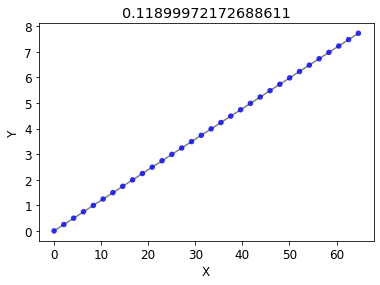

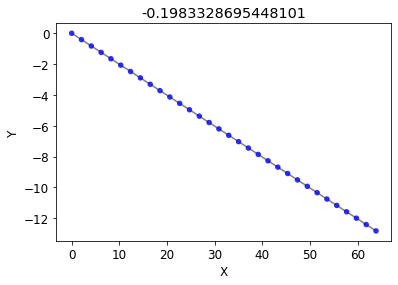

In [31]:
# generate random ICs based on filament angle

filament_init_shape = np.zeros(fil.Np*fil.dim, dtype = np.double)


# generate N random angles within the filament angular amplitude range
N_IC = 10
angle = np.pi/4
N_angles = 100
angles_array = np.linspace(-angle, angle, N_angles)

random_angles = random.sample(list(angles_array), N_IC)

print(random_angles)


for angle in random_angles:
 
    # generate filament shapes based on these angles
    for ii in range(fil.Np):
        fil.r0[ii] = ii*(fil.b0)*np.cos(angle)
        fil.r0[fil.Np+ii] = ii*(fil.b0)*np.sin(angle) 
        
    filament_init_shape = fil.r0
    
   
    fil.plotFilament(r = filament_init_shape, title = angle)
  

In [2]:
# Testing the filament Shape Generator Class

from pyfilaments.activeFilaments import activeFilament
from pyfilaments._def import *
#-------------------------------------------------------------
# Filament parameters
#-------------------------------------------------------------
NP = 32
D0 = 1.5
# Activity profile parameters
activity_timescale = 50 # Activity time-scale (one compression and extension cycle)
duty_cycle = 0.5	# Relative time for compression relative to total activity time-scale
n_activity_cycles = 1 # No:of activity cycles we want to simulate
Tf = activity_timescale*n_activity_cycles # Total simulation time
time_step_save = 5 # This is roughly 4X the axial stretch time-scale which is the smallest time-scale in the dynamics
Npts = int(Tf/time_step_save) # No:of time points saved

# Activity parameters
# Square-wave activity (Uncomment below)
activity_parameters = {'type':'square-wave','activity time scale':activity_timescale, 'duty_cycle':duty_cycle, 'start phase':0}

fil = activeFilament(dim = DIMS, Np = NP, radius = RADIUS, b0 = B0, k = K, S0 = S0, D0 = 1.5, bc = BC)

In [3]:
fil.simulate(Tf, Npts, save = True, overwrite = False, 
		path = ROOT_PATH, sim_type = 'point', init_condition = {'shape':'line'}, 
		activity = activity_parameters)


Param: 25 Progress:   0%|          | 0/100 [00:00<?, ?it/s]
Param: 25 Progress:  14%|█▍        | 14.456262091144012/100 [00:00<00:00, 170.90it/s]

square-wave



Param: 25 Progress:  33%|███▎      | 32.54687771043784/100 [00:00<00:00, 225.01it/s] 
Param: 25 Progress:  50%|████▉     | 49.85994098796385/100 [00:00<00:00, 229.57it/s]
Param: 25 Progress:  67%|██████▋   | 67.04767270010544/100 [00:00<00:00, 209.07it/s]
Param: 25 Progress:  81%|████████▏ | 81.49864225758266/100 [00:00<00:00, 201.76it/s]
Param: 25 Progress:  98%|█████████▊| 97.71870671911552/100 [00:00<00:00, 215.84it/s]/Users/deepak/opt/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/tqdm/std.py:535: TqdmWarning: clamping frac to range [0, 1]
  colour=colour)
Param: 25 Progress: 100%|██████████| 100.0046266816777/100 [00:00<00:00, 145.69it/s]

Saving results...
square-wave


In [28]:
R = 10
C = 0.01

coeff = (R**2 + C**2)**(1/2)

x_fun = lambda s: R*np.sin(s/coeff)
y_fun = lambda s: R*np.cos(s/coeff)
z_fun = lambda s: c*s/coeff

r0 = fil.filamentShapeGenerator.generate_filament_shape(init_condition={'shape':'parametric', 'x fun':x_fun, 'y fun':y_fun, 'z fun':z_fun})



In [22]:
fil.plotFilament(r=r0)

<IPython.core.display.Javascript object>


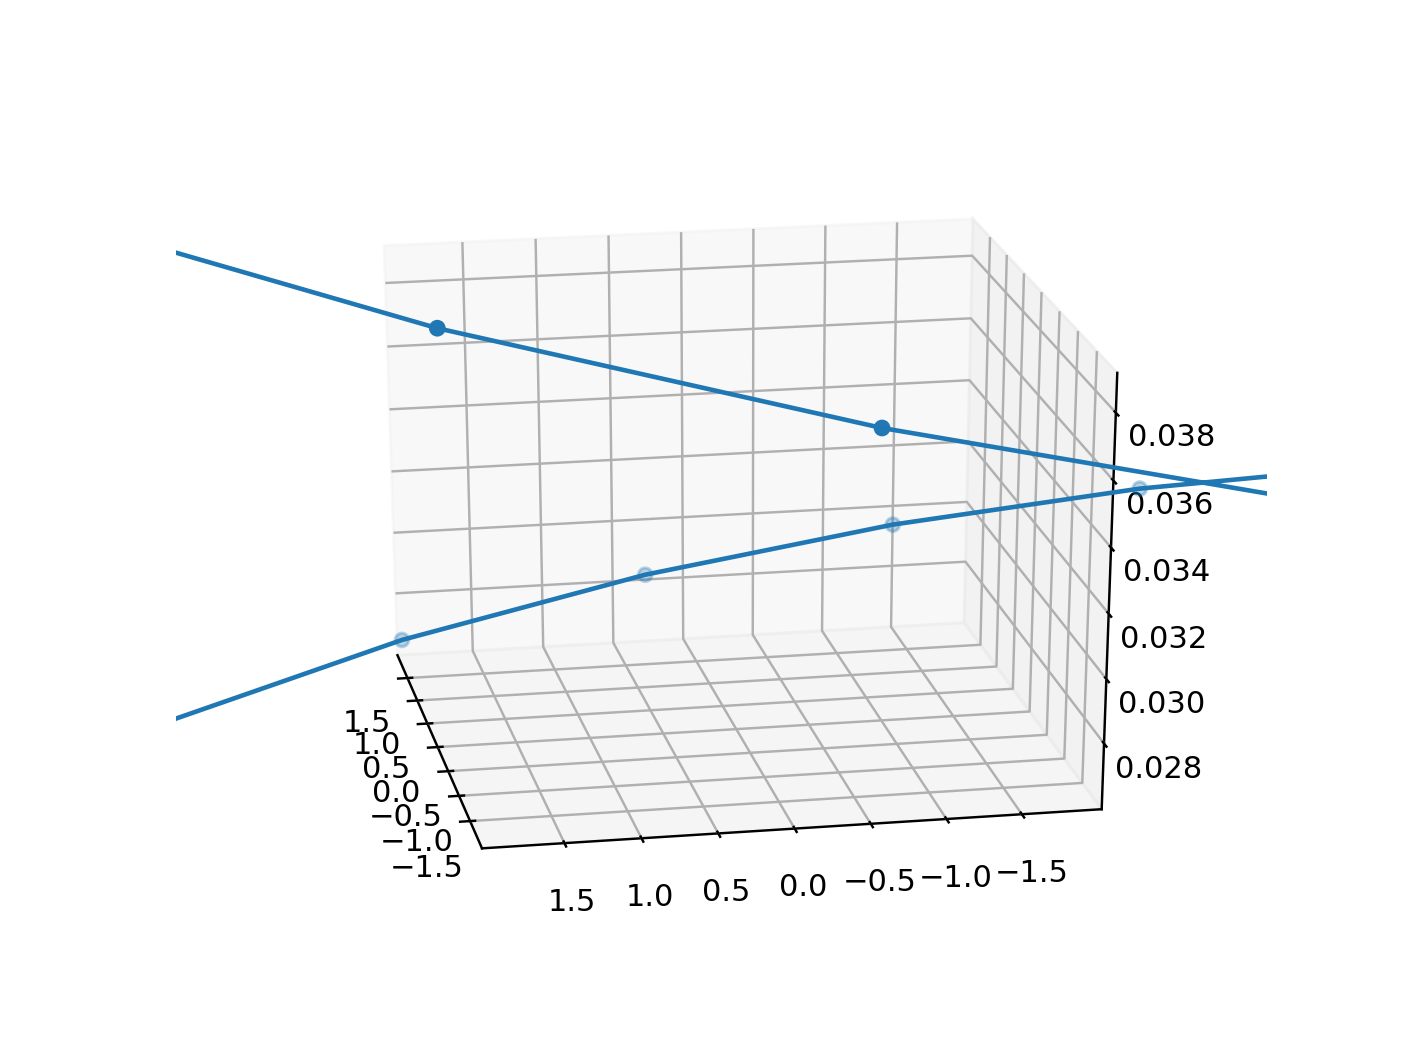

In [29]:
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(r0[:fil.Np], r0[fil.Np:2*fil.Np], r0[2*fil.Np:3*fil.Np])
ax.plot(r0[:fil.Np], r0[fil.Np:2*fil.Np], r0[2*fil.Np:3*fil.Np])

plt.show()